<a href="https://www.kaggle.com/code/adityavashist8215/automatic-tags-prediction-stackoverflow?scriptVersionId=250248016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# In this Notebook we have the labelled data of questions for tag prediction-
Use following techniques if using unlabelled dataset-
1. Use Word2Vec to create vector for each word and then using clustering algos like KMeans, DBScan find the similarity between each vector, extract top words as tags for each cluster
2. Using transformer where user have to proivde tags for each question and transformer architecture like Bert tell which is the best suited tags among given tags
3. Assigning Similar questions under same tags from trained dataset with tagged 

# Database

In [2]:
df=pd.read_csv('/kaggle/input/stack-overflow-tag-prediction/train.csv')
df.head()

,title,tags
0,How to draw a stacked dotplot in R?,['r']
1,mysql select all records where a datetime fiel...,"['php', 'mysql']"
2,How to terminate windows phone 8.1 app,['c#']
3,get current time in a specific country via jquery,"['javascript', 'jquery']"
4,Configuring Tomcat to Use SSL,['java']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   100000 non-null  object
 1   tags    100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [4]:
unique_tags=df['tags'].unique()
len(unique_tags)

7066

# Finding out max tags 

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [107]:
all_tags=[tag for row in df['tags'] for tag in row]
tags_count=Counter(all_tags)
top_10=tags_count.most_common(10)
labels,sizes=zip(*top_10)

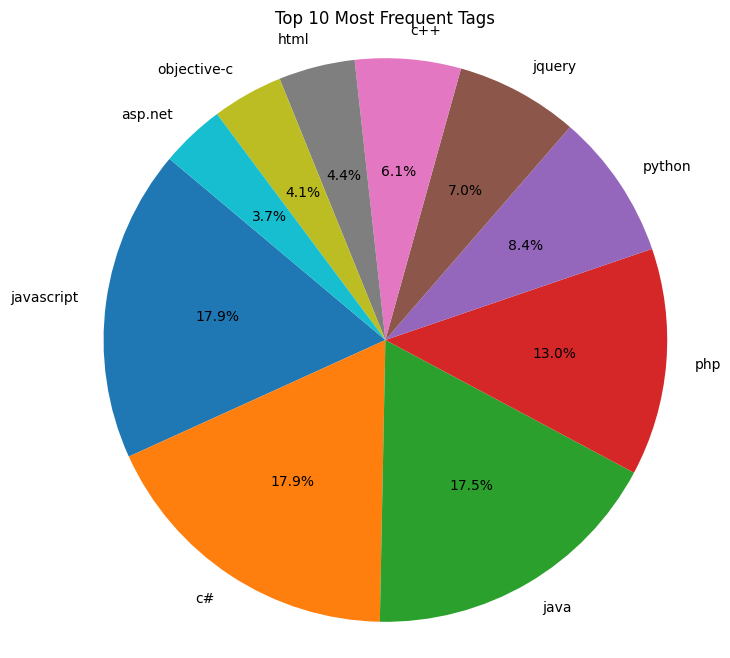

In [108]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Frequent Tags")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

# Data Preprration

In [103]:
x=df.drop(['tags'],axis=1)
x

KeyError: 3

# Data Cleaning & Preprocessing

In [6]:
import re
import nltk 
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1. lower
2. anything else unnecessary
3. remove stopwards
4. lemanitizing
6. Tokenize

In [9]:
stop_words = set(stopwords.words('english'))
lemantizer = WordNetLemmatizer()
def clean_text(text):
    text=text.lower()
    text = re.sub(r"[.,?]", "", text)
    tokens = word_tokenize(text)
    tokens1 = [word for word in tokens if word not in stop_words]
    tokens = [lemantizer.lemmatize(word) for word in tokens1]
    return " ".join(tokens)

In [10]:
x['questions']=x['title'].apply(clean_text)


In [124]:
df['title'][5]

'Awesome nested set plugin - how to add new children to the tree at various levels'

In [11]:
x=x.drop(['title'],axis=1)
x[]

,questions
0,draw stacked dotplot r
1,mysql select record datetime field less specif...
2,terminate window phone 81 app
3,get current time specific country via jquery
4,configuring tomcat use ssl
...,...
99995,obj-c incorrect checksum freed object - object...
99996,connect via http using jsoup
99997,python panda series datetimes second since epoch
99998,jqgrid issue grouping - duplicate row get appe...


## OHE for multilabel class in tags- can't use tokenizer as multilabel 

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

df['tags'] = df['tags'].apply(ast.literal_eval) # converting to list
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['tags'])
num_tags=len(mlb.classes_)

In [13]:
df['tags']

0                                            [r]
1                                   [php, mysql]
2                                           [c#]
3                           [javascript, jquery]
4                                         [java]
                          ...                   
99995    [iphone, objective-c, ios, cocoa-touch]
99996                            [java, android]
99997                 [python, datetime, pandas]
99998                       [javascript, jquery]
99999                     [java, list, generics]
Name: tags, Length: 100000, dtype: object

In [14]:
for idx, tag in enumerate(mlb.classes_):
    print(f"{idx}: {tag}")

0: .net
1: ajax
2: algorithm
3: android
4: angularjs
5: apache
6: arrays
7: asp.net
8: asp.net-mvc
9: c
10: c#
11: c++
12: class
13: cocoa-touch
14: codeigniter
15: css
16: csv
17: database
18: date
19: datetime
20: django
21: dom
22: eclipse
23: entity-framework
24: excel
25: facebook
26: file
27: forms
28: function
29: generics
30: google-maps
31: hibernate
32: html
33: html5
34: image
35: ios
36: iphone
37: java
38: javascript
39: jquery
40: json
41: jsp
42: laravel
43: linq
44: linux
45: list
46: loops
47: maven
48: mongodb
49: multithreading
50: mysql
51: node.js
52: numpy
53: objective-c
54: oop
55: opencv
56: osx
57: pandas
58: parsing
59: performance
60: php
61: pointers
62: python
63: python-2.7
64: python-3.x
65: qt
66: r
67: regex
68: rest
69: ruby
70: ruby-on-rails
71: ruby-on-rails-3
72: selenium
73: servlets
74: session
75: sockets
76: sorting
77: spring
78: spring-mvc
79: sql
80: sql-server
81: string
82: swift
83: swing
84: twitter-bootstrap
85: uitableview
86: unit-tes

## tokenizer for sentences 

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

2025-07-13 10:03:04.971686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752400985.157805      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752400985.213241      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x['questions'])
len(tokenizer.word_index)

26968

In [17]:
x=tokenizer.texts_to_sequences(x['questions'])

In [18]:
max(len (i)for i in x)


26

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x=pad_sequences(x,20,padding='post')  ## ? why max len only can i take avg

In [20]:
x[3],len(y)

(array([   9,  203,   54,  145, 1683,  187,   17,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32),
 100000)

## splitting dataset

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [22]:
x_train.shape,y_train.shape

((80000, 20), (80000, 100))

In [23]:
num_tags

100

# Model Training

In [47]:
from keras.layers import Embedding, Dense, LSTM, Bidirectional
from keras.models import Sequential 

In [48]:
model =Sequential([
    Embedding(input_dim=26968,output_dim = 200,input_length=20,input_shape=(20,)),
    Bidirectional(LSTM(256,return_sequences=True)),
    Bidirectional(LSTM(256)),
    Dense(100,activation='sigmoid'),
])


In [49]:
from keras.metrics import AUC, Precision, Recall
model.compile(optimizer='adam',metrics=[Precision(), Recall(), AUC()],loss='binary_crossentropy')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 200)        │     5,393,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 20, 512)        │       935,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 512)            │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,955,748 (30.35 MB)

 Trainable params: 7,955,748 (30.35 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler
def warm_up(epoch):
    if epoch<3:
        return 1e-4 *(2e-4)
    else :
        return 0.0001
lr_callback=LearningRateScheduler(warm_up)

callback=EarlyStopping(
    monitor='val_recall',
    min_delta=0.00001,
    patience=5,
    verbose=1,
    mode='max',
    restore_best_weights=True
)

In [51]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,verbose=1,callbacks=[callback,lr_callback])

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 46s 16ms/step - auc_3: 0.5617 - loss: 0.6921 - precision_3: 0.0240 - recall_3: 0.5186 - val_auc_3: 0.5727 - val_loss: 0.6914 - val_precision_3: 0.0248 - val_recall_3: 0.4673 - learning_rate: 2.0000e-08
Epoch 2/50
   9/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - auc_3: 0.5597 - loss: 0.6914 - precision_3: 0.0227 - recall_3: 0.4245

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_recall` which is not available. Available metrics are: auc_3,loss,precision_3,recall_3,val_auc_3,val_loss,val_precision_3,val_recall_3
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - auc_3: 0.5747 - loss: 0.6911 - precision_3: 0.0251 - recall_3: 0.4493 - val_auc_3: 0.5862 - val_loss: 0.6903 - val_precision_3: 0.0264 - val_recall_3: 0.4121 - learning_rate: 2.0000e-08
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - auc_3: 0.5871 - loss: 0.6900 - precision_3: 0.0268 - recall_3: 0.4013 - val_auc_3: 0.5939 - val_loss: 0.6892 - val_precision_3: 0.0284 - val_recall_3: 0.3731 - learning_rate: 2.0000e-08
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - auc_3: 0.7898 - loss: 0.0983 - precision_3: 0.0462 - recall_3: 0.0069 - val_auc_3: 0.8125 - val_loss: 0.0791 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - auc_3: 0.8258 - loss: 0.0758 - precision_3: 0.6570 - recall_3: 0.0472 - val_auc_3: 0.8906 - val_loss: 0.0608 - val_precision_3: 0.8797 - val_recall_3: 0.2436 - learning_rate: 1.0000e-04
Epoch 6/50
2500/2500 ━━━━━━

In [125]:
text=['Awesome nested set plugin - how to add new children to the tree at various levels']
se=tokenizer.texts_to_sequences(text)
t1=pad_sequences(se,20)

In [126]:
pred=model.predict(t1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [127]:
predicted = (pred > 0.5).astype(int) 
predicted

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [128]:
predicted_tags = mlb.inverse_transform(predicted)
print(predicted_tags)

[('c#', 'python')]
